<a href="https://colab.research.google.com/github/start-dash/Intro-to-ML/blob/main/HW3_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1

Libraries

In [28]:
# Import Data Set splitting to Training and Test Data
from sklearn.model_selection import train_test_split
# Do proper scaling and standardiztion before the training.
from sklearn.preprocessing import StandardScaler
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression
# Use Confusion matrix to get the accuracy of the model.
from sklearn.metrics import confusion_matrix
# For better accuracy
from sklearn.datasets import load_breast_cancer
# Evaluate the model using evaluation metrics: Accuracy, precision, and recall.
from sklearn import metrics

import numpy as np
# Plotting heatmaps
import matplotlib.pyplot as plt
import pandas as pd
# Visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.
import seaborn as sns

Load URL

In [29]:
url = "https://raw.githubusercontent.com/start-dash/Intro-to-ML/main/Datasets/cancer.csv"
cancer = pd.read_csv(url)
breast_set = load_breast_cancer()
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Preprocessing

In [43]:
dataset = cancer.drop('id',  axis=1)
diagnosis = dataset.pop('diagnosis')
dataset.insert(30,'label',diagnosis)

dataset.columns = np.append(breast_set.feature_names, 'diagnosis')
dataset['diagnosis'].replace('B', 0, inplace=True)
dataset['diagnosis'].replace('M', 1, inplace=True)

X = dataset.iloc[:,:30].values
Y = dataset.iloc[:, 30].values

In [44]:
# Proper scaling is done via feature scaling, or scaling the data b/w 0 and 1 to get better accuracy.
# Scaling is important since theere is a huge difference between all the X inputs. This also standardizes.
# Scaler object is made
sc_X = StandardScaler()
# The scaler is fit to the training data and transform
X_train = sc_X.fit_transform(X)
# Apply the scaler to the test data
X_test = sc_X.transform(X_train)

In [45]:
# Split the Data set into Training Data and Test Data.
# Training data will be used to train the Logistic model and Test data will be used to validate the model.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.20, random_state = 0) # 80% and 20% split between training and evaluation (test).

Logistic Regression

In [46]:
# Make an instance classifier of the object LogisticRegression and give random_state = 0
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [47]:
Y_pred = classifier.predict(X_test)

In [48]:
Y_pred[0:30]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1])

Model Evaluation

In [50]:
# Evaluate the model using evaluation metrics: Accuracy, precision, and recall.
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred, average='binary'))
print("Recall:", metrics.recall_score(Y_test, Y_pred, average='binary'))

print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

Accuracy: 0.9473684210526315
Precision: 0.9183673469387755
Recall: 0.9574468085106383
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

[[63  4]
 [ 2 45]]


Plotting

Text(0.5, 427.9555555555555, 'Predicted label')

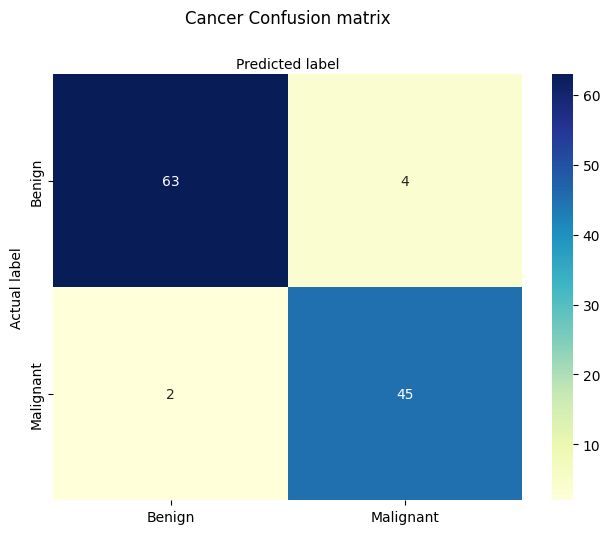

In [51]:
# Confusion matrix is visualized using Heatmap.
cnf_matrix = confusion_matrix(Y_test, Y_pred)

fig, ax = plt.subplots()
class_names = ["Benign","Malignant"] # name of classes
# heatmap is created
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
plt.tight_layout()
plt.title('Cancer Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Part 2

Regularization Penalty

In [52]:
C = [10, 1, .1, .01, .001]

# Use X_train and X_test from earlier part.
x_train = X_train
x_test = X_test

for c in C:
  clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
  clf.fit(x_train, Y_train)
  print('C:', c)
  print('Training accuracy:', clf.score(x_train, Y_train))
  print('Test accuracy:', clf.score(x_test, Y_test))
  print('')

# Regularization penalty becomes more prominent as C decreases the model coefficients become smaller

C: 10
Training accuracy: 0.9758241758241758
Test accuracy: 0.9649122807017544

C: 1
Training accuracy: 0.9626373626373627
Test accuracy: 0.956140350877193

C: 0.1
Training accuracy: 0.9406593406593406
Test accuracy: 0.9385964912280702

C: 0.01
Training accuracy: 0.9186813186813186
Test accuracy: 0.9385964912280702

C: 0.001
Training accuracy: 0.9164835164835164
Test accuracy: 0.9122807017543859



Logistic Regression & Confusion Matrix + Regularization Penalty

In [53]:
clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
clf.fit(x_train, Y_train)

y_pred = clf.predict(x_test)

param_cnf_matrix = confusion_matrix(Y_test, y_pred)

Model Evaluation + Regularization Penalty

In [57]:
print("Model Accuracy: ", metrics.accuracy_score(Y_test, y_pred))
print("Model Precision: ", metrics.precision_score(Y_test, y_pred))
print("Model Recall: ", metrics.recall_score(Y_test, y_pred))
print("Model F1 Score: ", metrics.f1_score(Y_test, y_pred), "\n")

Model Accuracy:  0.9122807017543859
Model Precision:  1.0
Model Recall:  0.7872340425531915
Model F1 Score:  0.880952380952381 



Plot + Regularization Penalty


              precision    recall  f1-score   support

           0       0.87      1.00      0.93        67
           1       1.00      0.79      0.88        47

    accuracy                           0.91       114
   macro avg       0.94      0.89      0.91       114
weighted avg       0.92      0.91      0.91       114

[[67  0]
 [10 37]]


Text(0.5, 427.9555555555555, 'Predicted label')

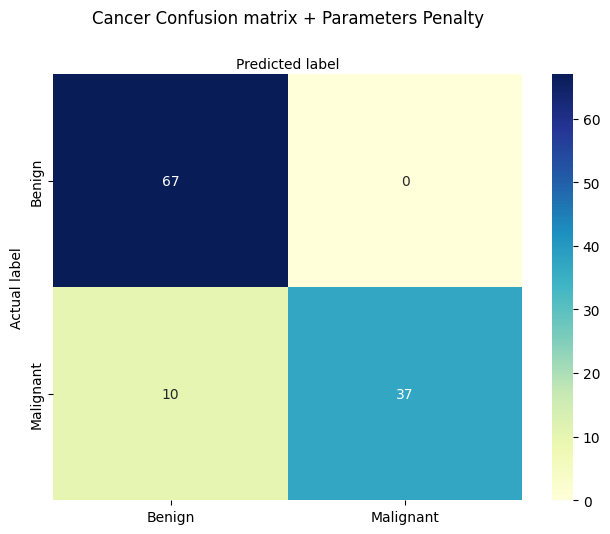

In [58]:
print(metrics.classification_report(Y_test, y_pred))
print(metrics.confusion_matrix(Y_test, y_pred))
fig, ax = plt.subplots()
class_names = ["Benign", "Malignant"] # name of classes
# create heatmap
sns.heatmap(pd.DataFrame(param_cnf_matrix), annot=True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
plt.tight_layout()
plt.title('Cancer Confusion matrix + Parameters Penalty', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')